# TP : initiation à l'estimation de fréquences par la TFTD

On rappelle la définition de la TFTD d'un signal de durée $N$ échantillons, calculée à la fréquence normalisée $\nu $ : 
$$
X(\nu) = \sum_{n=0}^{N-1} x[n]e^{-i2\pi \nu n}
$$

Nous allons illustrer le fait que cette fonction est capable, sous certaines conditions, d'estimer les fréquences des sinusoïdes présentes dans un mélange stationnaire. 




## I Propriétés immédiates et calcul "brute force"

**propriétés essentielles :** 
1. la fonction $\nu \mapsto X(\nu)$ est périodique de période $1$
2. La fonction $\nu \mapsto X(\nu)$ admet la symétrie Hermitienne 
    $$
    X(-\nu)=\overline{X(\nu)}
    $$
et donc la fonction $\nu \mapsto \left|X(\nu)\right|$ est une fonction paire. 

**Définition :** on appelle périodogramme du signal la fonction définie par 
$$
I(\nu)=\frac{1}{N} \left| X(\nu) \right|^2
$$


Voici les fonctions Python usuelles : 


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io


class signal_mono: 
    pass


## on conviendra que les champs d'un signal_mono sont : 
##  signal.x  : les valeurs du signal 
##  signal.N= : le nombre d'échantillons 
##  signal.Fe : la frequence d'echantillonnage en Hz
##  signal.t : le vecteur des temps associé
## EXEMPLE D'APPLICATION :  plt.plot(signal.t,signal.x)

class periodogramme:
    pass
## on conviendra que les champs d'un periodogramme (appelons-le S) sont : 
##  S.val  : les valeurs du spectre 
##  S.nu : le vecteur des fréquences normalisées 
##  S.Fe : la frequence d'echantillonnage en Hz
## EXEMPLE D'APPLICATION :  plt.plot((S.nu)*XS.Fs,S.val)

def creer_periodogramme(valeurs,nu,Fs):
    S=spectre()
    S.val=valeurs
    S.nu = nu
    S.Fe = Fs
    return(S)


def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;   ### conversion automatique au format réel et normalisation 


def creer_signal(valeurs,Fe):
    out = signal_mono()
    out.x = normaliser_son_mono(valeurs)
    out.N= np.size(out.x)
    out.Fe=Fe
    out.t=np.arange(out.N)/Fe
    return out

def lire_signal(nom_fichier):
    rate, data = io.read(nom_fichier)
    return(creer)

def extraire_signal(signal,t_min,t_max):
    condition = ( signal.t   < t_max )*( signal.t > t_min)
    out= signal_mono
    out.x = np.extract(condition,signal.x)
    out.t=np.extract(condition,signal.t)
    out.N= np.size(out.x)
    out.Fe=signal.Fe
    print(np.size(out.x))
    return out

def enregistrer_son(nom_fichier,signal,Fe):
    y=0.5*normaliser_son_mono(signal.x)  ### le facteur 0.5 pour éviter d'exploser les oreilles...
    scaled = np.round(32767*y)   ### passage en 16 bits
    newdata = scaled.astype(np.int16)   ### conversion en type int
    io.write(nom_fichier, Fe, newdata)   ### codage en wav
    
 
  

### Question no 1 

1. Si $\overrightarrow{x}=(x_0,...,x_{N-1})$ et $\overrightarrow{y}=(y_0,...,y_{N-1})$ sont deux vecteurs à composantes complexes, on définit le produit scalaire (Hermitien) - en anglais : *Hermitian dot product* - ainsi :
$$
\langle \overrightarrow{x}, \overrightarrow{y} \rangle = \sum_{n=0}^{N-1} \overline{x_n}y_n.
$$
Montrez que, **à $\nu$ fixé**, $X(\nu)$ est le produit scalaire de deux vecteurs que vous préciserez.  
2. Supposons donné un signal `x` qui est de classe `signal_mono`. Complétez la fonction ``calcul_TFTD`` qui évalue la TFTD du signal aux fréquences d'un vecteur `nu`.
3. La fonction calcul_periodogramme vous est donnée.
4. Complétez la  fonction `extraire_periodogramme` qui extrait une partie du periodogramme entre deux fréquences données $f_{\min}$ et $f_{\max}$.  
  
On cherche les $X(\nu) = \sum_{n=0}^{N-1} x[n]e^{-i2\pi n\nu}$. On va donc poser $b[n] = x[n]$ et $a[n] = e^{i2\pi n \nu}$ car il doit être barré.  
On écrira donc `np.vdot(E, x)` quand on utilisera notre fonction `calcul_TFTD`. 
On va d'abord faire un `np.arange(N)` afin d'avoir toutes les valeurs de 0 à N-1, puis on y applique $i2\pi n\nu$ et enfin on y appliquera l'exponentielle.  
  
##### Def: 
le périodograme du signal x[0], ..., x[N-1] est
$$I[\nu] = \frac{1}{N} \left |X[\nu]\right|^2$$

In [4]:
### Aide : np.exp(1j*angle) calcule l'exponentielle complexe
###        la fonction numpy np.vdot effectue un produit scalaire Hermitien de deux vecteurs
###        ayant la même taille

def calcul_TFTD(signal,nu):
    N=signal.N
    x = signal.x
    X=np.zeros((np.size(nu)),complex)
    no_nu=0
    while (no_nu < np.size(nu)): 
        E=np.exp(1j*np.arange(N)*2*np.pi*nu[no_nu])
        X[no_nu] = np.vdot(x,E)
        no_nu=no_nu+1
    return(X)

def calcul_periodogramme(signal,nu):
    X = calcul_TFTD(signal,nu)/np.sqrt(signal.N)
    I = periodogramme
    I.val = np.abs(X)**2 
    I.nu = nu
    I.Fe = signal.Fe
    return(I)

def extraire_periodogramme(I,nu_min,nu_max):
    out= periodogramme
    
    return out



### Question no 2 

1. Créez un signal résultant de l'échantillonnage d'un signal réel sinusoïdal de fréquence $f_0=110$Hz en, choisissant $F_e=1000$Hz et une durée d'observation de $T=0.3$ seconde. 
2. Calculez son périodogramme de classe `periodogramme` en choisissant des fréquences `nu = np.arange(-1,1,0.001)`
    et représentez son graphe. 
3. Représentez un zoom du périodogramme autour de la fréquence $f_0$ et évaluez graphiquement la largeur du lobe principal autour de $f_0$. 
    


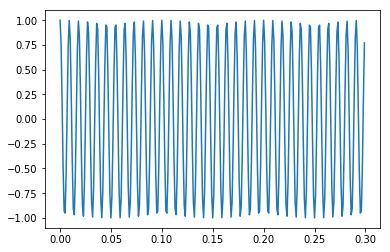

In [11]:
f0 = 110
Fe = 1000
T = 0.3

N = np.round(T*Fe)
valeurs = np.cos(2*np.pi*f0/Fe*np.arange(N))

x = creer_signal(valeurs, Fe)

plt.plot(x.t, x.x)

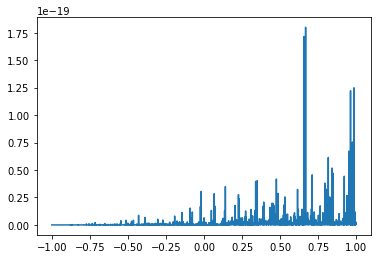

In [16]:
nu = np.arange(-1, 1, 0.001)
periodogramme = calcul_periodogramme(x, nu)

plt.plot(periodogramme.nu, periodogramme.val)

### Question no 3

1. Montrez que la TFTD du signal complexe $\left( \exp(i 2\pi \nu_0 n) \right)_{n=0,...,N-1}$ est 
$$
\exp(i\pi \nu (N-1))\frac{\sin(\pi N \nu )}{\sin(\pi \nu)}
$$
Quel est le lien avec le noyau de Dirichlet?
  
On a $$X(\nu) = \sum_{0}^{N-1} e^{i2\pi n(\nu_{0} - \nu)} = \sum_{0}^{N-1} \left(e^{i2\pi(\nu_{0} - \nu)}\right)^{n}$$
Or on sait que $\sum z^{n} = \frac{z^{n} - 1}{z - 1}$ donc ici on a 
$$X(\nu) = \frac{e^{i2\pi N(\nu_{0} - \nu)} -1}{e^{i2\pi(\nu_{0} - \nu)} -1} = \frac{e^{i\pi(\nu_{0}-\nu)N}\left(e^{i\pi(\nu_{0}-\nu)N} - e^{-i\pi(\nu_{0}-\nu)N} \right)}{e^{i\pi(\nu_{0}-\nu)}\left(e^{i\pi(\nu_{0}-\nu)} - e^{-i\pi(\nu_{0}-\nu)} \right)}$$
On obtient donc, comme $e^{i\theta} - e^{-i\theta} = 2isin(\theta)$ :
$$e^{i\pi(\nu_0 - \nu)(N-1)} \frac{sin(\pi N(\nu_{0}-\nu))}{sin(\pi(\nu_{0}-\nu))}$$
  
Lorsque $\nu = \nu_0$ on a une forme indéterminée. On retiendra que $\frac{sin(\pi N(\nu_0 - \nu))}{sin(\pi(\nu_0 - \nu))} \approx \frac{\pi N(\nu_0 - \nu)}{\pi(\nu_0 - \nu)} \longrightarrow N$  
  
Noyau de Dirichlet :  
$$D_N(\theta) = \frac{sin(\pi N \theta)}{sin(\pi \theta)}$$
On peut en dire que :  
- paire  
- périodique de période 1  
- $D_N(0) = N$  
  
##### Conséquence :  
Le module de la TF du signal $x[\mu] = e^{i2\pi n\nu_0}$. Il y a un pic en $\nu_0$.
  
##### Généralisation :  
Supposons $y[n] = cos(2\pi n\nu_0) = \frac{e^{i2\pi n\nu_0} + e^{-i2\pi n\nu_0}}{2} = \frac{1}{2} \left[ e^{i\pi(N-1)(\nu_0-\nu)} D_N(\nu-\nu_0) + e^{-i\pi(N-1)(\nu + \nu_0)} D_N(\nu + \nu_0)\right]$.
  
##### Extension :  
$$z[n] = A_0cos(2\pi n \nu_0) + A_1cos(2\pi n\nu_1)$$
C'est le modèle d'un accord de 2 sons simples. Des signaux sans harmoniques.
  
On dit que la résolution de la TF est $\frac{2}{N}$ . C'est la capacité de la TF à distinguer 2 sinusoïdes.  
  
  
2. Quelle est la TFTD théorique du signal $\left(\cos(2\pi \nu_0 n) \right)_{n=0,...,N-1}$? 
2. Justifier pourquoi, lorsque $\nu_0$ n'est pas trop "petite", le périodogramme  du signal 
$\left(\cos(2\pi \nu_0 n) \right)_{n=0,...,N-1}$ est constitué de lobes dont le principal est est centré en  $\nu_0$, de largeur $2/N$. 

3. Quelle est l'atténuation en décibels entre le lobe principal et le premier lobe secondaire? (vous supposerez que $N$ est assez grand). 

4. Superposez sur un même graphe le périodogramme calculé numériquement et le périodogramme "théorique" calculé *via* l'expression donnée au-dessus. 


### Question no 4

Cette fois, le signal d'analyse est 
$$
x(t)=\cos(2\pi f_0 t)+ \frac{1}{2}\cos(2\pi f_1 t)
$$
et est observé pendant $T=0.3$ secondes. On supposera que  $f_0<f_1 < \frac{F_e}{2}$. 
1. Justifiez brièvement pourquoi le périodogramme du signal laisse apparaître, si $f_1$ et $f_0$ sont "assez éloignées", deux pics situés en $\nu_0=f_0 T_e$ et $\nu_1=f_1 T_e$. 
2. Quelle est la condition dépendant de $f_1-f_0$ et $T$ pour que le périodogramme permette de discriminer les deux fréquences? 
3. Dessinez le périodogramme du signal (même figure, trois graphiques) dans les cas suivants :
   
   * $f_0=110$Hz, $f_1=120$Hz, $F_e=1000$Hz 
   * $f_0=110$Hz, $f_1=104$Hz, $F_e=1000$Hz
   * $f_0=110$Hz, $f_1=101$Hz, $F_e=1000$Hz

## II Application : calcul du périodogramme d'un signal acoustique

Vous pouvez télécharger le fichier `Domine_quando_veneris_debut.wav`, l'écouter et le décoder dans votre environnement Python. Si vous voulez écouter l'intégralité du morceau, vous pouvez le télécharger ici :  https://www.dropbox.com/s/1nlvaq7hvrepyv0/1-01%20Domine%20quando%20veneris.wav?dl=0

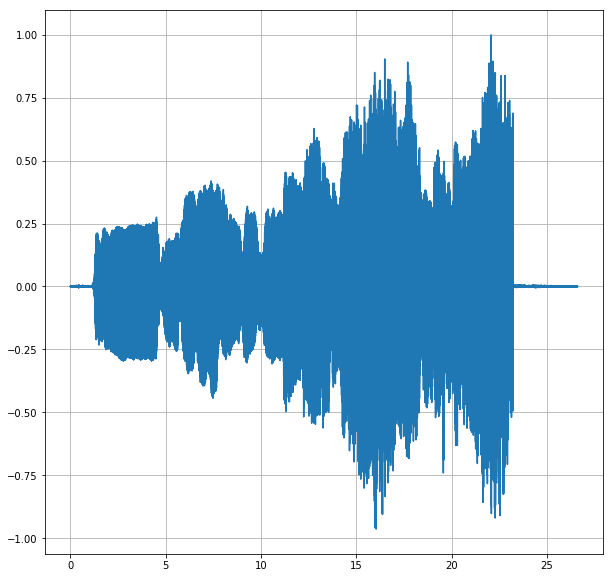

In [85]:
rate, data = io.read('Domine_quando_veneris_debut.wav')

signal=creer_signal(data[:,0],rate)
plt.figure(1,figsize = (10, 10)) 
plt.plot(signal.t,signal.x)
plt.grid()
plt.show()



1. Vous travaillerez avec deux parties stationnaires du signal : 
  * `signal1` est le signal entre les instants $1.5$s et $2.5$s
  * `signal2` est le signal entre les instants $5.5$s et $6.5$s
Utilisez la fonction `extraire_signal` pour calculer les deux signaux ci-dessus. Dessinez le graphe de ces signaux.
  
2. Calculez le spectre de `signal1` pour les fréquences allant de $200$Hz à $2000$Hz avec un pas de $0.3$Hz et représentez son graphe en échelle logarithmique (axe des ordonnées). A quelles fréquences sont situés les pics du périodogramme? Concluez.
3. Re prendre la question précédente mais cetet fois avec `signal2`. Peut-on estimer l'accord joué à l'orgue? 


In [79]:
nu  = np.arange(200,2000,0.3)/signal.Fe

I1 = calcul_periodogramme(signal1,nu)
plt.figure(1,figsize = (10, 10)) 
plt.plot((I2.nu)*I2.Fe, np.log(I2.val))
plt.grid()
plt.show()
